## Importing libraries

In [124]:
import sqlite3
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import itertools
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D

## Reading the data from the sqlite db

In [2]:
with sqlite3.connect('database.sqlite') as file:
    countries = pd.read_sql_query('SELECT * FROM Country', file)
    matches = pd.read_sql_query('SELECT * FROM Match', file)
    leagues = pd.read_sql_query('SELECT * FROM League', file)
    teams = pd.read_sql_query('SELECT * FROM Team', file)
    player = pd.read_sql_query('SELECT * FROM Player', file)
    player_attributes = pd.read_sql_query('SELECT * FROM Player_Attributes', file)
    sequence = pd.read_sql_query('SELECT * From sqlite_sequence', file)
    team_attributes = pd.read_sql_query('SELECT * FROm Team_Attributes', file)

## A glance at the data 

In [3]:
countries.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [4]:
leagues.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [5]:
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [6]:
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [7]:
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [8]:
player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [9]:
sequence.head(10)

,name,seq
0,Team,103916
1,Country,51958
2,League,51958
3,Match,51958
4,Player,11075
5,Player_Attributes,183978
6,Team_Attributes,1458


In [10]:
team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


## Joining the datasets

In [11]:
country_league = countries.merge(leagues, on='id', how='outer')
country_league.drop('id', axis=1, inplace=True)
country_league.rename(columns = {'name_x': 'country', 'name_y': 'league'}, inplace=True)
country_league = country_league[['country_id', 'country', 'league']]

In [12]:
country_league.head()

,country_id,country,league
0,1,Belgium,Belgium Jupiler League
1,1729,England,England Premier League
2,4769,France,France Ligue 1
3,7809,Germany,Germany 1. Bundesliga
4,10257,Italy,Italy Serie A


In [13]:
matches1 = matches[['country_id', 'league_id', 'season', 'stage', 'date',
                    'match_api_id', 'home_team_api_id', 'away_team_api_id',
                    'home_team_goal', 'away_team_goal']]
matches1.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [14]:
df = matches1.merge(country_league, on='country_id', how='outer')
df.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium,Belgium Jupiler League
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium,Belgium Jupiler League
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium,Belgium Jupiler League
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Belgium,Belgium Jupiler League
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Belgium,Belgium Jupiler League


In [15]:
df.isnull().sum()

country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
country             0
league              0
dtype: int64

In [16]:
df.nunique()

country_id             11
league_id              11
season                  8
stage                  38
date                 1694
match_api_id        25979
home_team_api_id      299
away_team_api_id      299
home_team_goal         11
away_team_goal         10
country                11
league                 11
dtype: int64

## Displaying the teams on a map

In [17]:
coordinates = pd.read_excel('latlong.xlsx')

In [18]:
coordinates.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [19]:
country_display = country_league.merge(coordinates, left_on='country', right_on = 'name', how='left')

In [20]:
country_display.drop(['country_id', 'country_y', 'name'], inplace=True, axis=1)
country_display.head()

,country_x,league,latitude,longitude
0,Belgium,Belgium Jupiler League,50.503887,4.469936
1,England,England Premier League,51.752000,1.257700
2,France,France Ligue 1,46.227638,2.213749
3,Germany,Germany 1. Bundesliga,51.165691,10.451526
4,Italy,Italy Serie A,41.871940,12.567380


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


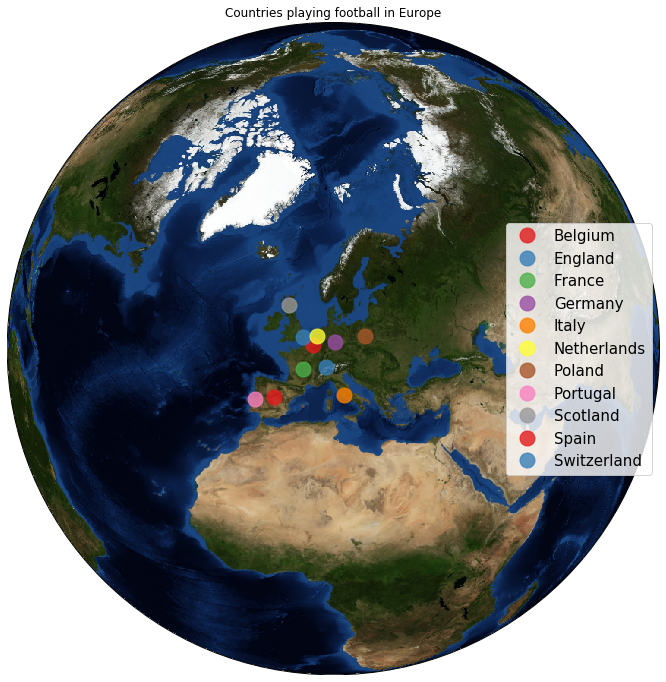

In [29]:
m3 = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=10, urcrnrlat=80, llcrnrlat=-80)
plt.figure(figsize=(12, 12))
country=list(country_display['country_x'].unique())
c = sns.color_palette('Set1', 11)
label = country

def plot_map(country, c, label):
    lat = list(country_display[country_display['country_x'] == country].latitude)
    lon = list(country_display[country_display['country_x'] == country].longitude)
    x, y = m3(lon, lat)
    m3.plot(x, y, 'go', markersize=15, color=j, alpha=.8, label=i)
    
for i, j in zip(country, c):
    plot_map(i, j, i)
    
m3.bluemarble(scale=0.5)
plt.legend(loc='center right', frameon=True, prop = {'size':15}).get_frame().set_facecolor('white')
plt.title('Countries playing football in Europe')
plt.show()

In [46]:
country_info = country_display

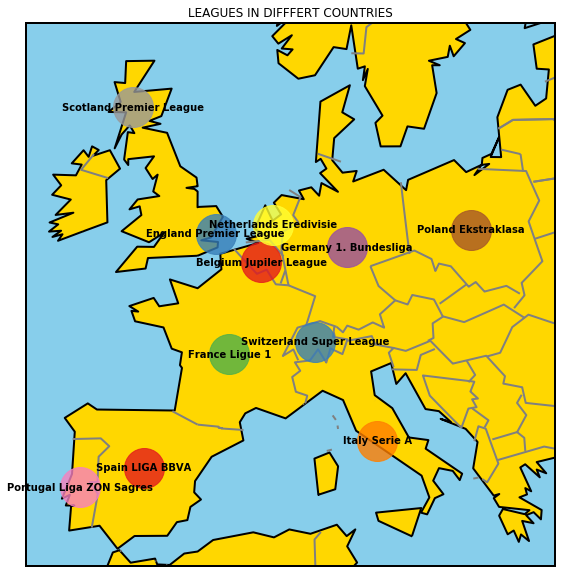

In [50]:
m = Basemap(projection = 'merc', llcrnrlat = 35, urcrnrlat = 60, llcrnrlon = -12, urcrnrlon = 25, lat_ts = 20, lat_0 = True, lon_0 = True)
plt.figure(figsize=(15, 10))

m.drawmapboundary(fill_color='skyblue', color='black', linewidth=2)
m.drawcoastlines(linewidth=2)
m.drawcountries(linewidth = 2, color = 'grey')
m.fillcontinents(color='gold', alpha=1, lake_color='b')

leag = list(country_display['league'].unique())
c = sns.color_palette('Set1', 11)
lat = list(country_display[country_display['league'] == leag].latitude)
lon = list(country_display[country_display['league'] == leag].longitude)
x, y = m(lon, lat)

def plot_map(leag, c):
    lat = list(country_display[country_display['league'] == leag].latitude)
    lon = list(country_display[country_display['league'] == leag].longitude)
    x, y = m(lon, lat)
    m.plot(x, y, 'go', markersize = 40, color = j, alpha = .8, linewidth = 20)
    
for i, j in zip(leag, c):
    plot_map(i, j)
    
for i,j,k in itertools.zip_longest(x,y,country_display["league"]):
    plt.text(i,j,k,fontsize =10,color="k",horizontalalignment='center',verticalalignment='center',weight="bold")
plt.title("LEAGUES IN DIFFFERT COUNTRIES")
plt.show()

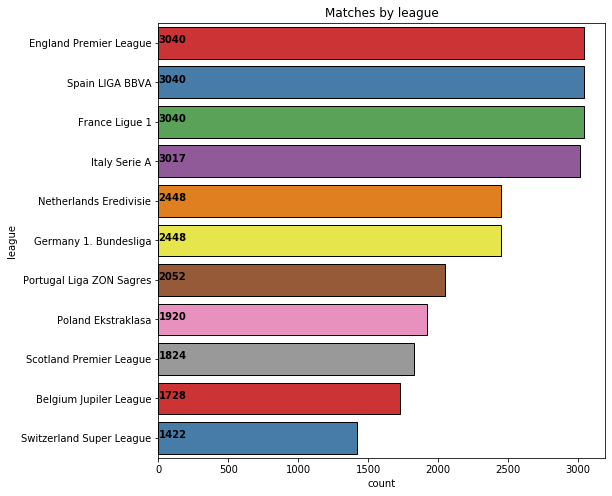

In [64]:
plt.figure(figsize = (8, 8))
ax = sns.countplot(y = df['league'], order = df['league'].value_counts().index, 
                   linewidth = 1, edgecolor = 'k' * df['league'].nunique(), palette='Set1')
for i, j in enumerate(df['league'].value_counts().values):
    ax.text(.7, i, j, weight = 'bold')
plt.title('Matches by league')
plt.show()

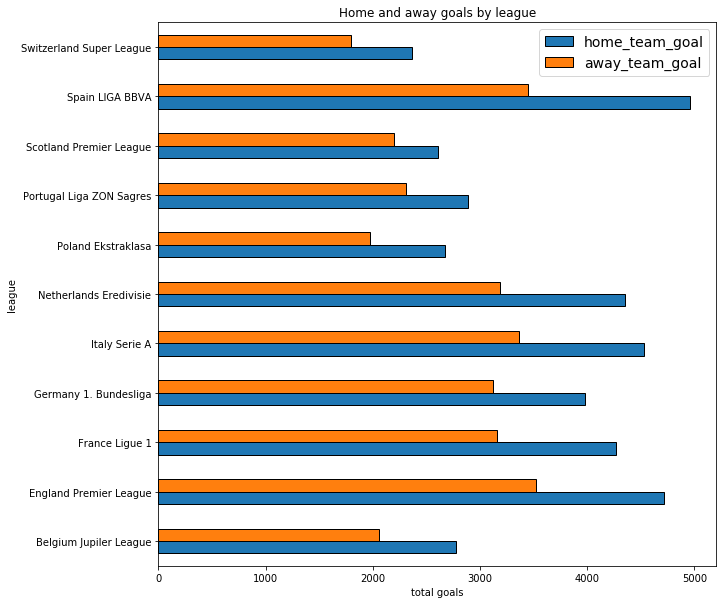

In [59]:
df.groupby('league').agg({'home_team_goal':'sum', 'away_team_goal':'sum'}).plot(kind = 'barh', figsize = (10, 10), edgecolor = 'k', linewidth = 1)
plt.title('Home and away goals by league')
plt.legend(loc = 'best', prop = {'size': 14})
plt.xlabel('total goals')
plt.show()

In [60]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['year'] = pd.DatetimeIndex(df['date']).year

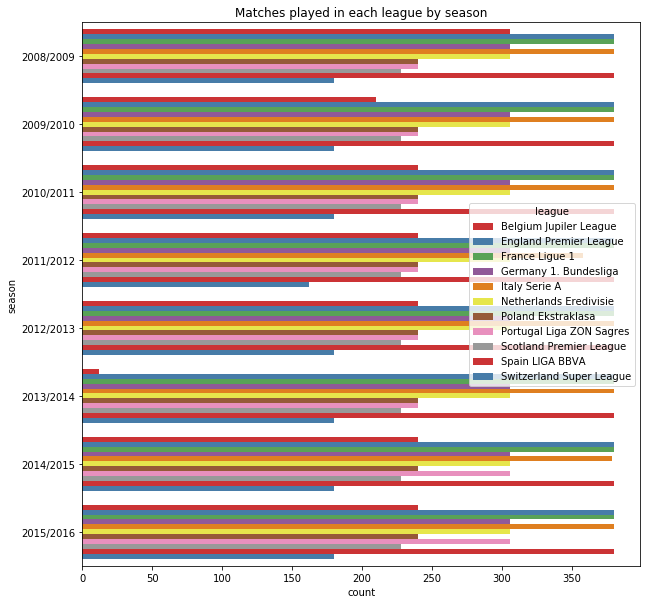

In [63]:
plt.figure(figsize = (10, 10))
sns.countplot(y = df['season'], hue = df['league'], palette = 'Set1')
plt.title('Matches played in each league by season')
plt.show()

In [67]:
df = df.merge(teams, left_on = 'home_team_api_id', right_on = 'team_api_id', how = 'left')
df = df.drop(['id', 'team_api_id', 'team_fifa_api_id'], axis = 1)
df = df.rename(columns = {'team_long_name': 'home_team_lname', 'team_short_name': 'home_team_sname'})
df.columns

Index(['country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id',
       'home_team_api_id', 'away_team_api_id', 'home_team_goal',
       'away_team_goal', 'country', 'league', 'year', 'home_team_lname',
       'home_team_sname'],
      dtype='object')

In [68]:
df = df.merge(teams, left_on = 'away_team_api_id', right_on = 'team_api_id', how = 'left')
df = df.drop(['id', 'team_api_id', 'team_fifa_api_id'], axis = 1)
df = df.rename(columns = {'team_long_name': 'away_team_lname', 'team_short_name': 'away_team_sname'})
df.columns

Index(['country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id',
       'home_team_api_id', 'away_team_api_id', 'home_team_goal',
       'away_team_goal', 'country', 'league', 'year', 'home_team_lname',
       'home_team_sname', 'away_team_lname', 'away_team_sname'],
      dtype='object')

In [69]:
df.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league,year,home_team_lname,home_team_sname,away_team_lname,away_team_sname
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium,Belgium Jupiler League,2008,KRC Genk,GEN,Beerschot AC,BAC
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,Belgium,Belgium Jupiler League,2008,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,Belgium,Belgium Jupiler League,2008,KSV Cercle Brugge,CEB,RSC Anderlecht,AND
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,Belgium,Belgium Jupiler League,2008,KAA Gent,GEN,RAEC Mons,MON
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,Belgium,Belgium Jupiler League,2008,FCV Dender EH,DEN,Standard de Liège,STL


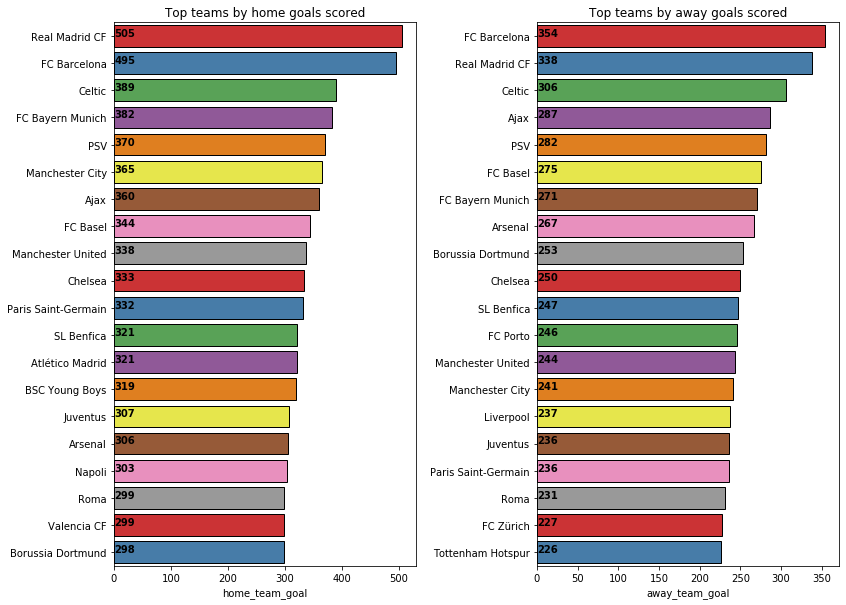

In [71]:
ht = df.groupby('home_team_lname')['home_team_goal'].sum().reset_index()
at = df.groupby('away_team_lname')['away_team_goal'].sum().reset_index()
ht = ht.sort_values(by = 'home_team_goal', ascending = False)
at = at.sort_values(by = 'away_team_goal', ascending = False)
plt.figure(figsize = (13, 10))

plt.subplot(121)
ax = sns.barplot(y = 'home_team_lname', x = 'home_team_goal', data = ht[:20], palette = 'Set1', linewidth = 1, edgecolor = 'k'*20)
plt.ylabel('')
plt.title('Top teams by home goals scored')
for i, j in enumerate(ht['home_team_goal'][:20]):
    ax.text(.7, i, j, weight = 'bold')

plt.subplot(122)
ax = sns.barplot(y = 'away_team_lname', x = 'away_team_goal', data = at[:20], palette = 'Set1', linewidth = 1, edgecolor = 'k'*20)
plt.ylabel('')
plt.subplots_adjust(wspace = .4)
plt.title('Top teams by away goals scored')
for i, j in enumerate(at['away_team_goal'][:20]):
    ax.text(.7, i, j, weight = 'bold')

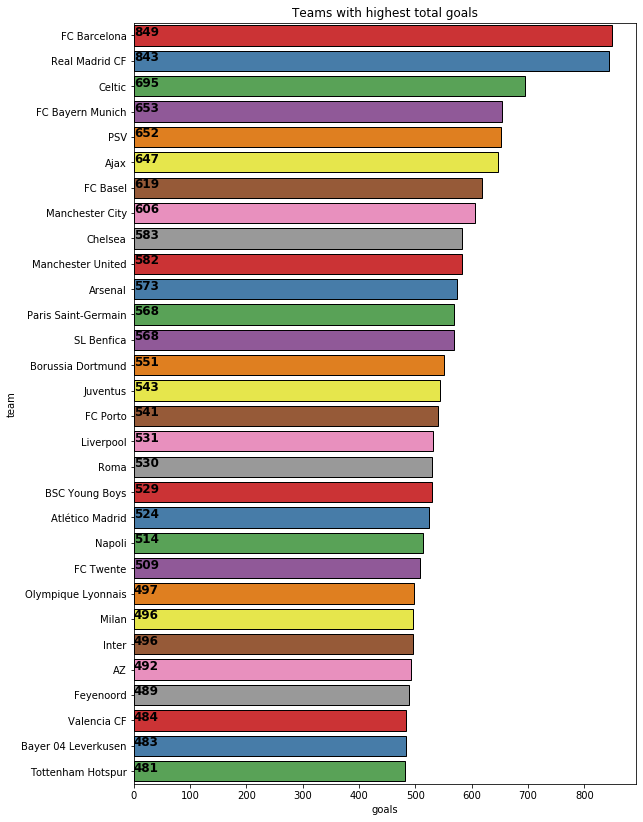

In [73]:
x = ht
x = x.rename(columns = {'home_team_lname' : 'team', 'home_team_goal' : 'goals'})
y = at
y = y.rename(columns = {'away_team_lname' : 'team', 'away_team_goal' : 'goals'})
goals = pd.concat([x, y])
goals = goals.groupby('team')['goals'].sum().reset_index().sort_values(by = 'goals', ascending = False)
plt.figure(figsize = (9, 14))
ax = sns.barplot(x = 'goals', y = 'team', data = goals[:30], palette = 'Set1', linewidth = 1, edgecolor = 'k'*30)
for i, j in enumerate(goals['goals'][:30]):
    ax.text(.3, i, j, weight = 'bold', color = 'k', fontsize = 12)
plt.title('Teams with highest total goals')
plt.show()

In [79]:
x = df.groupby('home_team_lname')['match_api_id'].count().reset_index()
x = x.rename(columns = {'home_team_lname': 'team'})
y = df.groupby('away_team_lname')['match_api_id'].count().reset_index()
y = y.rename(columns = {'away_team_lname': 'team'})
xy = pd.concat([x, y], axis = 0)
match_teams = xy.groupby('team')['match_api_id'].sum().reset_index().sort_values(by = 'match_api_id', ascending=False)
match_teams = match_teams.rename(columns = {'match_api_id': 'matches_played'})
match_teams[:20]

,team,matches_played
51,Chelsea,304
22,Athletic Club de Bilbao,304
186,Paris Saint-Germain,304
256,Sunderland,304
180,Olympique de Marseille,304
179,Olympique Lyonnais,304
255,Stoke City,304
83,FC Lorient,304
273,Valencia CF,304
168,Málaga CF,304


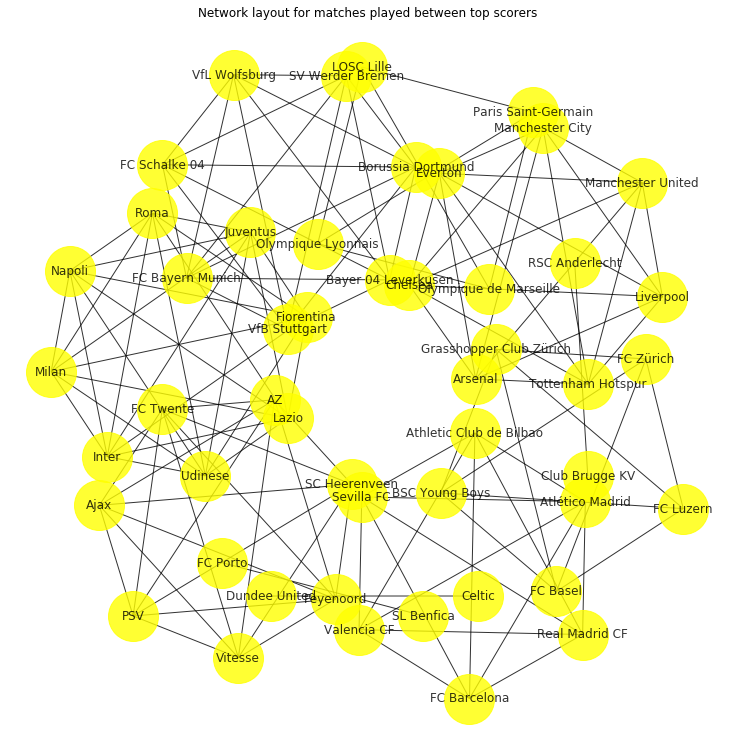

In [86]:
ts = list(goals['team'][:50])
v = df[['home_team_lname', 'away_team_lname']]
v = v[(v['home_team_lname'].isin(ts)) & (v['away_team_lname'].isin(ts))]
g = nx.from_pandas_edgelist(v, 'home_team_lname', 'away_team_lname')
fig = plt.figure(figsize = (10, 10))
nx.draw_kamada_kawai(g, with_labels = True, node_size = 2500, node_color = 'yellow', alpha = .8)
plt.title('Network layout for matches played between top scorers')
fig.set_facecolor('white')

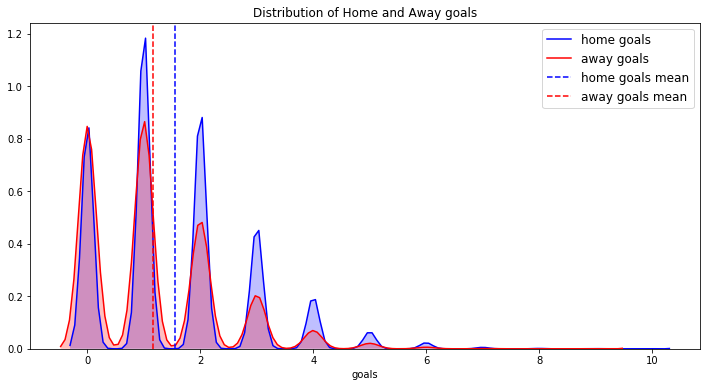

In [91]:
plt.figure(figsize = (12, 6))
sns.kdeplot(df['home_team_goal'], shade = True, color = 'b', label = 'home goals')
sns.kdeplot(df['away_team_goal'], shade = True, color = 'r', label = 'away goals')
plt.axvline(df['home_team_goal'].mean(), linestyle = 'dashed', color = 'b', label = 'home goals mean')
plt.axvline(df['away_team_goal'].mean(), linestyle = 'dashed', color = 'r', label = 'away goals mean')
plt.legend(loc = 'best', prop = {'size': 12})
plt.title('Distribution of Home and Away goals')
plt.xlabel('goals')
plt.show()

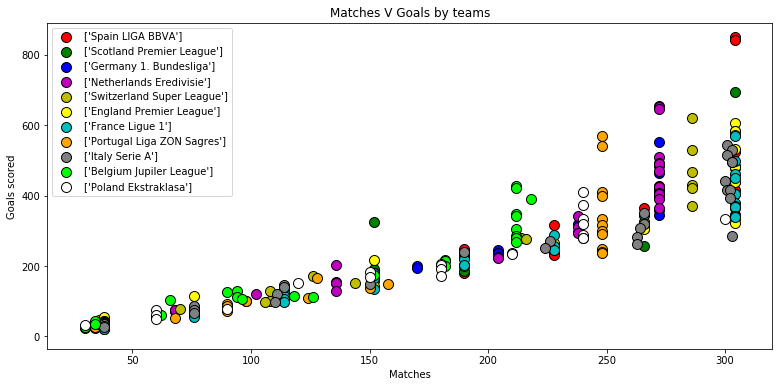

In [118]:
x = df.groupby(['home_team_lname', 'league']).agg({'match_api_id':'count', 'home_team_goal':'sum'}).reset_index()
y = df.groupby(['away_team_lname', 'league']).agg({'match_api_id':'count', 'away_team_goal':'sum'}).reset_index()
x = x.rename(columns = {'home_team_lname':'team', 'match_api_id':'matches', 'home_team_goal':'goals'})
y = y.rename(columns = {'away_team_lname':'team', 'match_api_id':'matches', 'away_team_goal':'goals'})
xy = pd.concat([x, y])
xy = xy.groupby(['team', 'league'])[['matches', 'goals']].sum().reset_index()
xy = xy.sort_values(by = 'goals', ascending = False)
plt.figure(figsize = (13, 6))
c = ['r', 'g', 'b', 'm', 'y', 'yellow', 'c', 'orange', 'grey', 'lime', 'white']
lg = xy['league'].unique()
for i, j, k in itertools.zip_longest(lg, range(len(lg)), c):
    plt.scatter('matches', 'goals', data = xy[xy['league'] == i], label = [i], s = 100, alpha = 1, linewidths = 1, edgecolor = 'k', color = k)
    plt.legend(loc = 'best')
    plt.xlabel('Matches')
    plt.ylabel('Goals scored')
plt.title('Matches V Goals by teams')
plt.show()

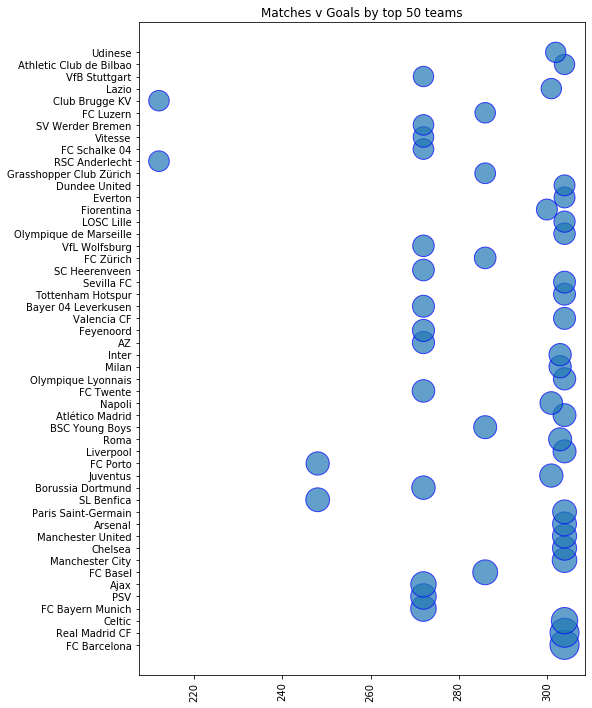

In [119]:
plt.figure(figsize = (8, 12))
plt.scatter(y = xy['team'][:50], x = xy['matches'][:50], s = xy['goals'], alpha = .7, linewidths = 1, edgecolors = 'b')
plt.xticks(rotation = 90)
plt.title('Matches v Goals by top 50 teams')
plt.show()

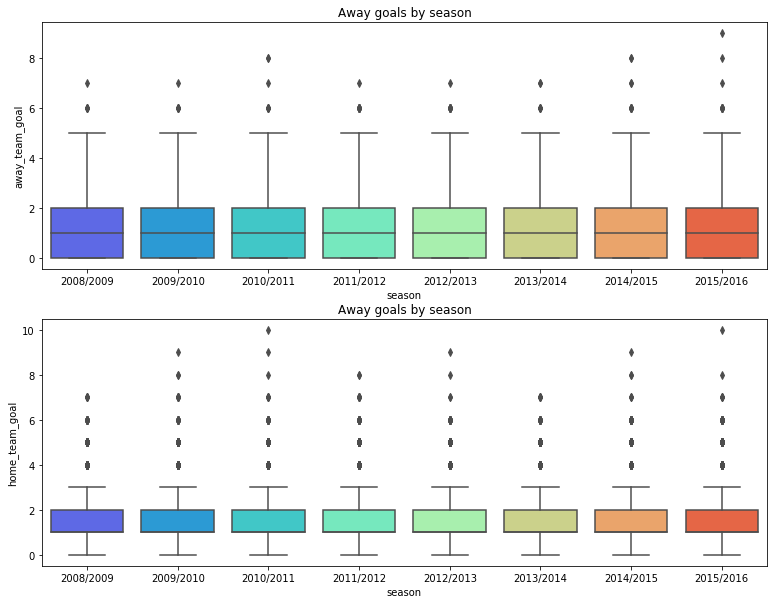

In [101]:
plt.figure(figsize = (13, 10))
plt.subplot(211)
sns.boxplot(x = df['season'], y = df['away_team_goal'], palette = 'rainbow')
plt.title('Away goals by season')
plt.subplot(212)
sns.boxplot(x = df['season'], y = df['home_team_goal'], palette = 'rainbow')
plt.title('Away goals by season')
plt.show()

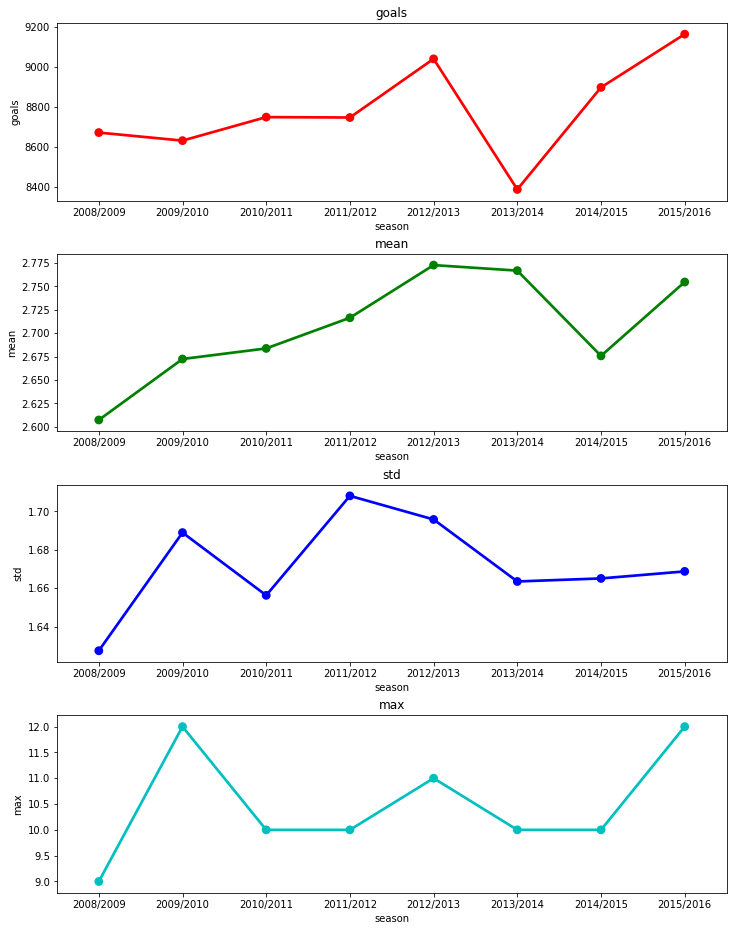

In [117]:
df['total_goal'] = df['home_team_goal'] + df['away_team_goal']
a = df.groupby('season').agg({'total_goal':'sum'})
m = df.groupby('season').agg({'total_goal':'mean'})
s = df.groupby('season').agg({'total_goal':'std'})
x = df.groupby('season').agg({'total_goal':'max'})
xx = a.merge(m, left_index = True, right_index = True, how = 'left')
yy = s.merge(x, left_index = True, right_index = True, how = 'left')
x_y = xx.merge(yy, left_index = True, right_index = True, how = 'left').reset_index()
x_y = x_y.rename(columns = {'total_goal_x_x':'goals', 'total_goal_y_x': 'mean', 'total_goal_x_y':'std', 'total_goal_y_y':'max'})
cols = ['goals', 'mean', 'std', 'max']
length = len(cols)
cs = ['r', 'g', 'b', 'c']
plt.figure(figsize = (12, 16))

for i, j, k in itertools.zip_longest(cols, range(length), cs):
    plt.subplot(length, length/length, j+1)
    sns.pointplot(x_y['season'], x_y[i], color = k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)

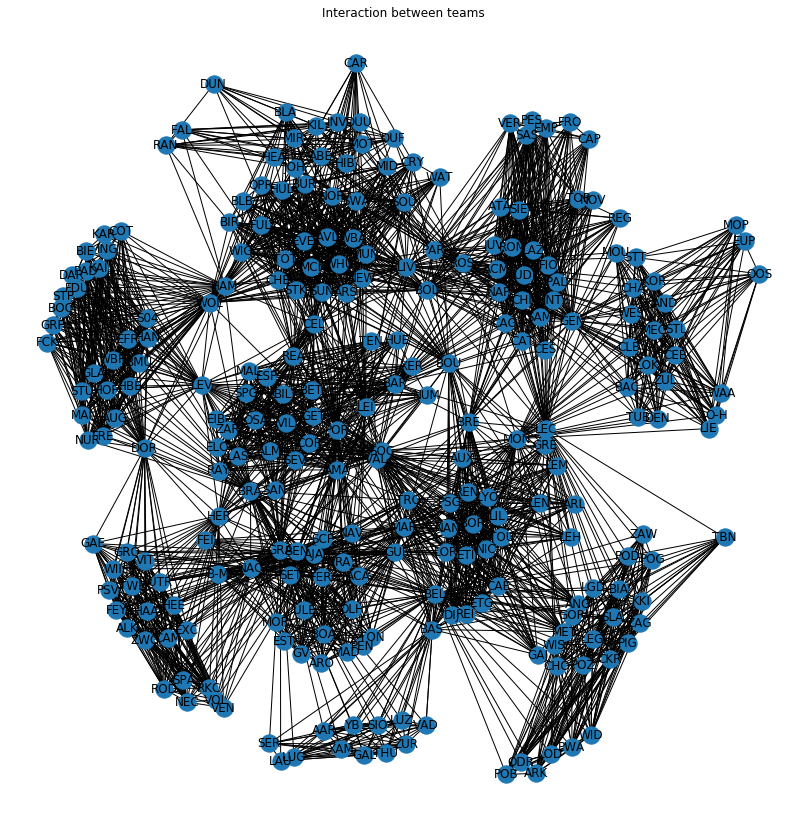

In [104]:
g = nx.from_pandas_edgelist(df, 'home_team_sname', 'away_team_sname')
fig = plt.figure(figsize = (11, 11))
nx.draw_kamada_kawai(g, with_labels = True)
plt.title('Interaction between teams')
fig.set_facecolor('white')

In [105]:
def label(data):
    if data['home_team_goal'] > data['away_team_goal']:
        return data['home_team_lname']
    elif data['away_team_goal'] > data['home_team_goal']:
        return data['away_team_lname']
    elif data['home_team_goal'] == data['away_team_goal']:
        return 'Draw'

In [106]:
df['win'] = df.apply(lambda df:label(df), axis = 1)

In [107]:
def lab(data):
    if data['home_team_goal'] > data['away_team_goal']:
        return 'Home team win'
    elif data['away_team_goal'] > data['home_team_goal']:
        return 'Away team win'
    elif data['home_team_goal'] == data['away_team_goal']:
        return 'Draw'

In [108]:
df['outcome_side'] = df.apply(lambda df:lab(df), axis=1)

In [109]:
def labe(data):
    if data['home_team_goal'] < data['away_team_goal']:
        return data['home_team_lname']
    elif data['away_team_goal'] < data['home_team_goal']:
        return data['away_team_lname']
    elif data['home_team_goal'] == data['away_team_goal']:
        return 'Draw'

In [110]:
df['lost'] = df.apply(lambda df:labe(df), axis=1)

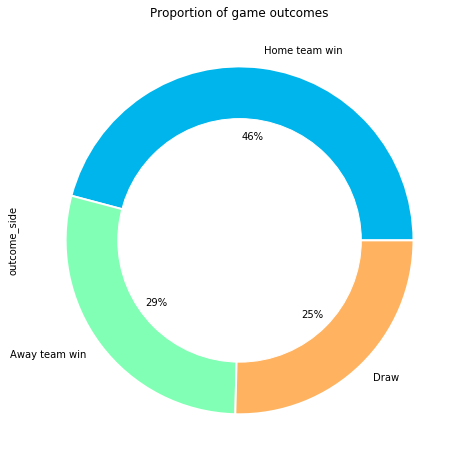

In [111]:
plt.figure(figsize = (8, 8))
df['outcome_side'].value_counts().plot.pie(autopct = '%1.0f%%', colors = sns.color_palette('rainbow', 3), wedgeprops = {'linewidth':2, 'edgecolor':'white'})
my_circ = plt.Circle((0, 0), .7, color = 'white')
plt.gca().add_artist(my_circ)
plt.title('Proportion of game outcomes')
plt.show()

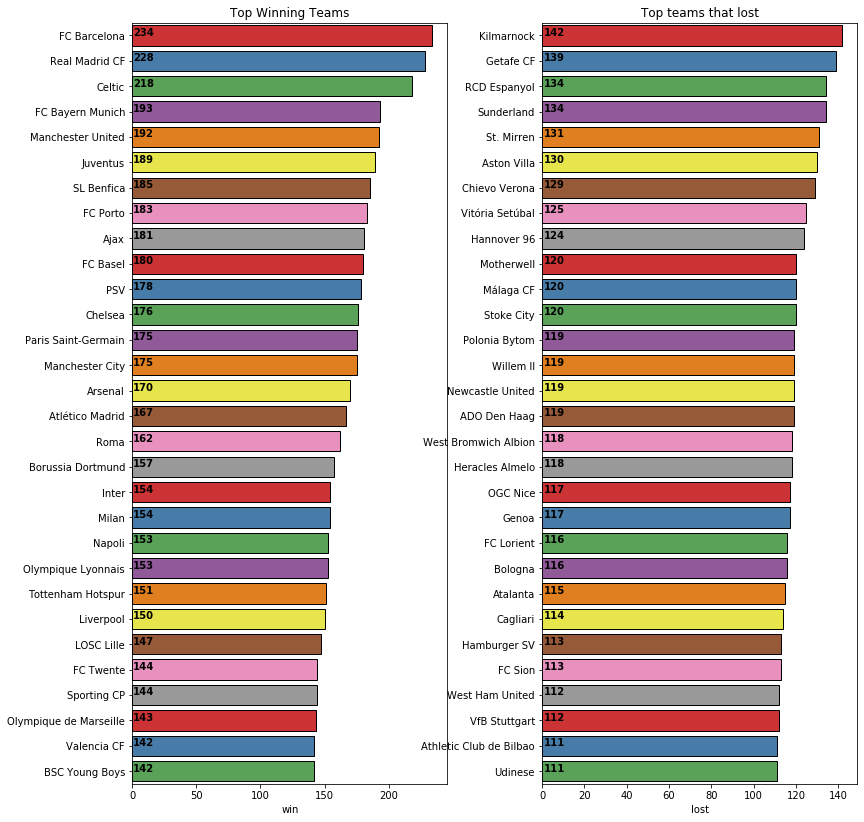

In [113]:
win = df['win'].value_counts()[1:].reset_index()
lost = df['lost'].value_counts()[1:].reset_index()
plt.figure(figsize = (13, 14))
plt.subplot(121)
ax = sns.barplot(win['win'][:30], win['index'][:30], palette = 'Set1', linewidth = 1, edgecolor = 'k'*30)
plt.title('Top Winning Teams')
plt.ylabel('')
for i, j in enumerate(win['win'][:30]):
    ax.text(.7, i, j, color = 'black', weight = 'bold')
plt.subplot(122)
ax = sns.barplot(lost['lost'][:30], lost['index'][:30], palette = 'Set1', linewidth = 1, edgecolor = 'k'*30)
plt.title('Top teams that lost')
plt.subplots_adjust(wspace = .3)
plt.ylabel('')
for i, j in enumerate(lost['lost'][:30]):
    ax.text(.7, i, j, color = 'black', weight = 'bold')

In [121]:
f = xy.merge(win, left_on = 'team', right_on = 'index', how = 'left')
f = f.drop('index', axis = 1)
f = f.rename(columns = {'outcome': 'wins'})
f = f.merge(lost, left_on = 'team', right_on = 'index', how = 'left')
f = f.drop('index', axis = 1)
dr = df[df['outcome_side'] == 'Draw'][['home_team_lname', 'away_team_lname']]
l = dr['home_team_lname'].value_counts().reset_index()
v = dr['away_team_lname'].value_counts().reset_index()
l = l.rename(columns = {'index':'team', 'home_team_lname':'draw'})
v = v.rename(columns = {'index':'team', 'away_team_lname':'draw'})
lv = pd.concat([l, v])
lv = lv.groupby('team')['draw'].sum().reset_index()
f = f.merge(lv, left_on = 'team', right_on = 'team', how = 'left')

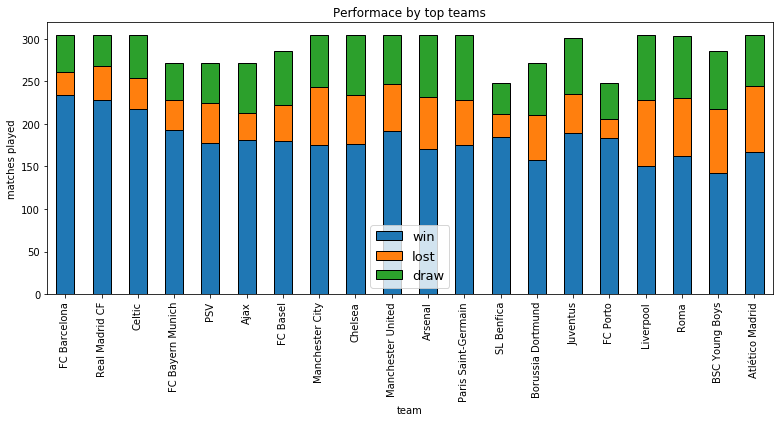

In [123]:
f = f.sort_values(by = 'goals', ascending = False)
f_new = f.copy()
f_new.index = f_new.team
f_new[['win', 'lost', 'draw']][:20].plot(kind = 'bar', figsize = (13, 5), stacked = True, linewidth = 1, edgecolor = 'k'*20)
plt.legend(loc = 'best', prop = {'size':13})
plt.title('Performace by top teams')
plt.ylabel('matches played')
plt.show()

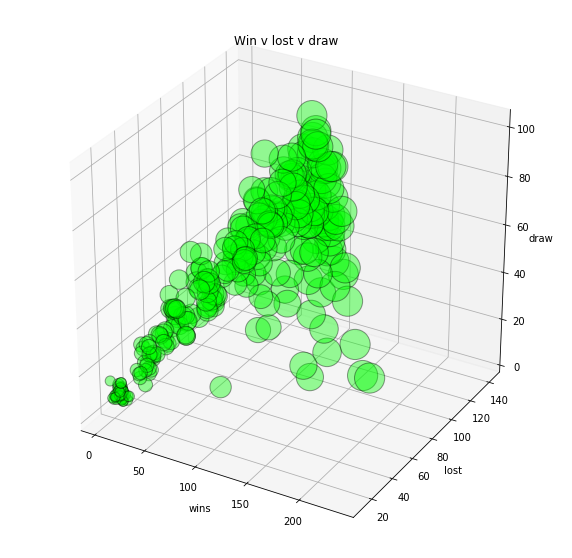

In [125]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(f['win'], f['lost'], f['draw'], s = f['matches']*3, alpha = .4, linewidth = 1, edgecolor = 'k', c = 'lime')
ax.set_xlabel('wins')
ax.set_ylabel('lost')
ax.set_zlabel('draw')
plt.title('Win v lost v draw')
plt.show()

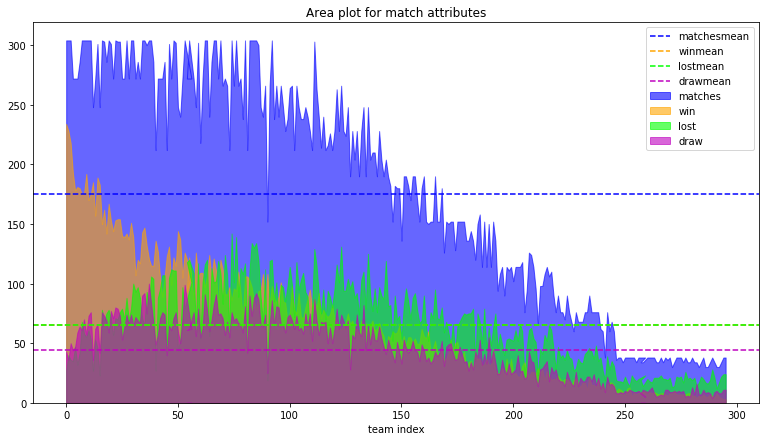

In [127]:
plt.figure(figsize = (13, 7))
cols = ['matches', 'win', 'lost', 'draw']
c = ['b', 'orange', 'lime', 'm']
length = len(cols)
for i, j, k in itertools.zip_longest(cols, range(length), c):
    plt.stackplot(f.index, f[i], alpha = .6, color = k, labels = [i])
    plt.axhline(f[i].mean(), color = k, linestyle = 'dashed', label = i+ 'mean')
    plt.legend(loc = 'best')
    plt.title('Area plot for match attributes')
    plt.xlabel('team index')